<a href="https://colab.research.google.com/github/DhruthiSRao/EXL2022/blob/main/PREDICTIVE_MAINTENANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = {
    'EquipmentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'OperatingHours': [1200, 1500, 1000, 1800, 1300, 1700, 1600, 1400, 1100, 2000],
    'Temperature': [75, 80, 70, 85, 78, 82, 80, 77, 74, 90],
    'Pressure': [30, 28, 32, 29, 31, 30, 33, 28, 30, 32],
    'Vibration': [0.2, 0.3, 0.1, 0.4, 0.2, 0.3, 0.4, 0.2, 0.1, 0.5],
    'Failure': [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
df.to_csv('equipment_data.csv', index=False)


Accuracy: 50.00%


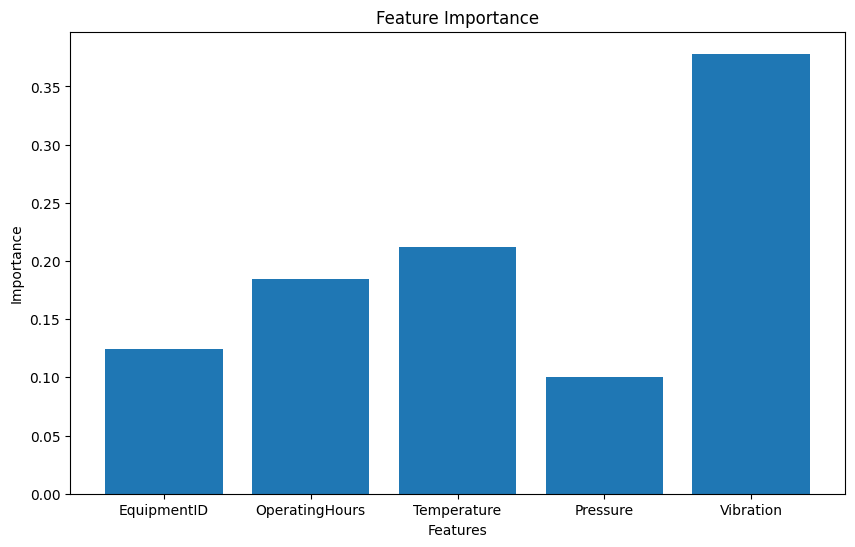

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('equipment_data.csv')
data['Failure'] = data['Failure'].astype(int)
X = data.drop('Failure', axis=1)
y = data['Failure']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
